# FACE MASK DETECTION

In [31]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dropout,Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

### Now we will give the path to where our dataset belongs --

In [32]:
main_directory = r"C:\Users\Uchiha_Itachi\Downloads\Compressed\2020\Untitled Folder\New Masks Dataset"
train_directory = os.path.join(main_directory,'Train')
validation_directory = os.path.join(main_directory,'Validation')
test_directory = os.path.join(main_directory,'Test')


In [33]:
#Assigning the directory to where the actual data is located

train_mask = os.path.join(train_directory,'Mask')
train_no_mask = os.path.join(train_directory,'Non Mask')


validation_mask = os.path.join(validation_directory,'Mask')
validation_no_mask = os.path.join(validation_directory,'Non Mask')


test_mask = os.path.join(test_directory,'Mask')
test_no_mask = os.path.join(test_directory,'Non Mask')

In [34]:
#To print the names of the files present in the 'Mask' and Non-Mask directories, we do the following.
train_mask_names = os.listdir(train_mask)
train_mask_names[:10]

['0003.jpg',
 '0006.jpg',
 '0018.jpg',
 '0019.jpg',
 '0022.jpg',
 '0027.jpg',
 '0029.jpg',
 '0037.jpg',
 '0040.jpg',
 '0042.jpg']

In [35]:
train_no_mask_names = os.listdir(train_no_mask)
train_no_mask_names[:10] 

['0.jpg',
 '1.jpg',
 '10.jpg',
 '100.jpg',
 '101.jpg',
 '102.jpg',
 '104.jpg',
 '105.jpg',
 '106.jpg',
 '107.jpg']

## Now we will visualize the images present in the train dataset.

In [36]:
import matplotlib.image as mpimg

In [37]:
rows = 4
cols = 4

mask_images = []
no_mask_images = []

for i in train_mask_names[:8]:
    mask_images.append(os.path.join(train_mask,i))
    
    
for i in train_no_mask_names[:8]:
    no_mask_images.append(os.path.join(train_no_mask,i))
    
    
print(mask_images)
#print(no_mask_images)

merged_list = mask_images + no_mask_images
print(merged_list)



['C:\\Users\\Uchiha_Itachi\\Downloads\\Compressed\\2020\\Untitled Folder\\New Masks Dataset\\Train\\Mask\\0003.jpg', 'C:\\Users\\Uchiha_Itachi\\Downloads\\Compressed\\2020\\Untitled Folder\\New Masks Dataset\\Train\\Mask\\0006.jpg', 'C:\\Users\\Uchiha_Itachi\\Downloads\\Compressed\\2020\\Untitled Folder\\New Masks Dataset\\Train\\Mask\\0018.jpg', 'C:\\Users\\Uchiha_Itachi\\Downloads\\Compressed\\2020\\Untitled Folder\\New Masks Dataset\\Train\\Mask\\0019.jpg', 'C:\\Users\\Uchiha_Itachi\\Downloads\\Compressed\\2020\\Untitled Folder\\New Masks Dataset\\Train\\Mask\\0022.jpg', 'C:\\Users\\Uchiha_Itachi\\Downloads\\Compressed\\2020\\Untitled Folder\\New Masks Dataset\\Train\\Mask\\0027.jpg', 'C:\\Users\\Uchiha_Itachi\\Downloads\\Compressed\\2020\\Untitled Folder\\New Masks Dataset\\Train\\Mask\\0029.jpg', 'C:\\Users\\Uchiha_Itachi\\Downloads\\Compressed\\2020\\Untitled Folder\\New Masks Dataset\\Train\\Mask\\0037.jpg']
['C:\\Users\\Uchiha_Itachi\\Downloads\\Compressed\\2020\\Untitled Folde

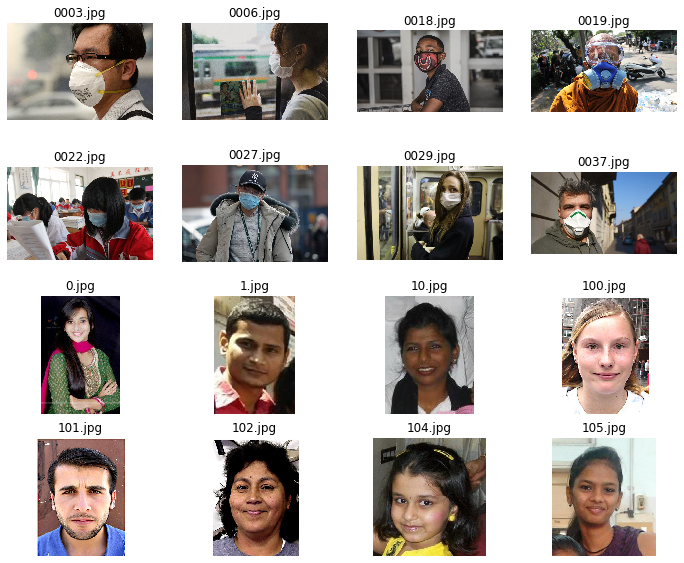

In [38]:
plt.figure(figsize=(12,10))
    
#print(mask_images)
#print(no_mask_images)
for i in range(0,len(merged_list)):
    data = merged_list[i].split('\\',10)[10]
    sp = plt.subplot(rows,cols,i+1)
    sp.axis("Off")
    image = mpimg.imread(merged_list[i])
    sp.set_title(data,fontsize = 12)
    plt.imshow(image,cmap='gray')
plt.show()



# Image Augmentation

In [39]:
train_augment = ImageDataGenerator(rescale=1.0/255,zoom_range=0.1,rotation_range=50,horizontal_flip=True,vertical_flip=True)
validation_augment = ImageDataGenerator(rescale=1.0/255)
test_augment = ImageDataGenerator(rescale=1.0/255)

### Now we will rescale the images present in our test-set, validation-set and test set.

In [40]:
train_generator = train_augment.flow_from_directory(train_directory,target_size=(200,200),batch_size=32,class_mode='binary')
validation_generator = validation_augment.flow_from_directory(validation_directory,target_size=(200,200),batch_size=32,
                                                              class_mode='binary')
test_generator = test_augment.flow_from_directory(test_directory,target_size=(200,200),batch_size=32,class_mode='binary')

Found 825 images belonging to 2 classes.
Found 306 images belonging to 2 classes.
Found 110 images belonging to 2 classes.


## So if we want to know which classes it has found so far - 
### print(train_generator.class_indices)
## To check the shape of the image - 
### print(train_generator.image_shape)

In [41]:
print(train_generator.class_indices)
print(train_generator.image_shape)
#3 represents channel, in our case it's RGB.

{'Mask': 0, 'Non Mask': 1}
(200, 200, 3)


# Building CNN Model

In [42]:
from tensorflow.keras.layers import Input, Conv2D, Lambda
from tensorflow.keras.models import Model



image_model = Sequential()
#Creating first CNN layer
image_model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(200,200,3)))
image_model.add(MaxPooling2D(pool_size=(2,2)))
image_model.add(Dropout(0.5))

#Creating Second Layer
image_model.add(Conv2D(32,(3,3),padding='SAME',activation='relu'))
image_model.add(MaxPooling2D(pool_size=(2,2)))
image_model.add(Dropout(0.5))

image_model.add(Flatten())

#Adding Dense Layers
image_model.add(Dense(256,activation='relu'))
image_model.add(Dropout(0.5))

#Creating O/P layer and getting the summary of the model.
image_model.add(Dense(1,activation='sigmoid'))
image_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 80000)            

# Training the model

In [43]:
image_model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])
train_model = image_model.fit(train_generator,epochs=50,validation_data=validation_generator)

Epoch 1/50
26/26 [==============================] - 31s 1s/step - loss: 1.4903 - accuracy: 0.6182 - val_loss: 0.6410 - val_accuracy: 0.8170
Epoch 2/50
26/26 [==============================] - 30s 1s/step - loss: 0.4794 - accuracy: 0.7952 - val_loss: 0.6334 - val_accuracy: 0.6863
Epoch 3/50
26/26 [==============================] - 29s 1s/step - loss: 0.3760 - accuracy: 0.8509 - val_loss: 0.5076 - val_accuracy: 0.7810
Epoch 4/50
26/26 [==============================] - 29s 1s/step - loss: 0.3956 - accuracy: 0.8703 - val_loss: 0.4615 - val_accuracy: 0.7941
Epoch 5/50
26/26 [==============================] - 29s 1s/step - loss: 0.3617 - accuracy: 0.8667 - val_loss: 0.4390 - val_accuracy: 0.8660
Epoch 6/50
26/26 [==============================] - 29s 1s/step - loss: 0.3014 - accuracy: 0.9018 - val_loss: 0.3614 - val_accuracy: 0.8399
Epoch 7/50
26/26 [==============================] - 28s 1s/step - loss: 0.3054 - accuracy: 0.8994 - val_loss: 0.3532 - val_accuracy: 0.8660
Epoch 8/50
26/26 [==

In [44]:
train_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Plotting Loss vs Accuracy 

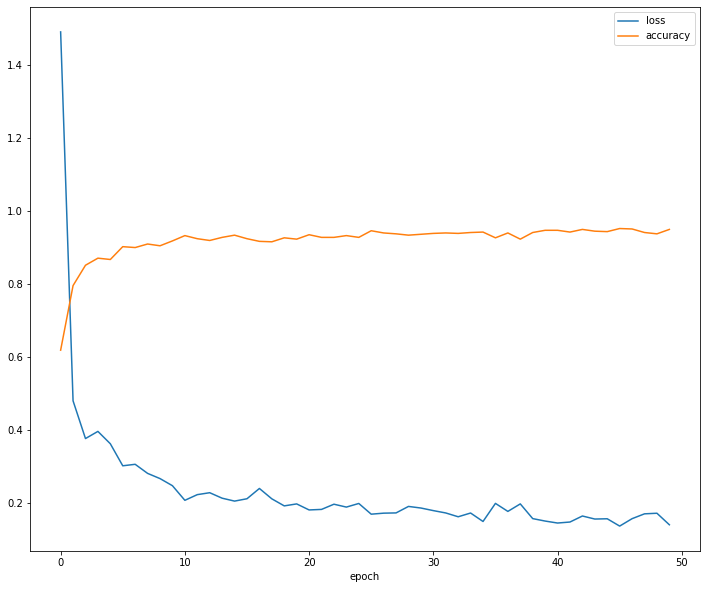

In [45]:
plt.figure(figsize=(12,10))
plt.plot(train_model.history['loss'])
plt.plot(train_model.history['accuracy'])
plt.legend(['loss','accuracy'])
plt.xlabel('epoch')
plt.show()

# Plotting Validation Accuracy vs Accuracy

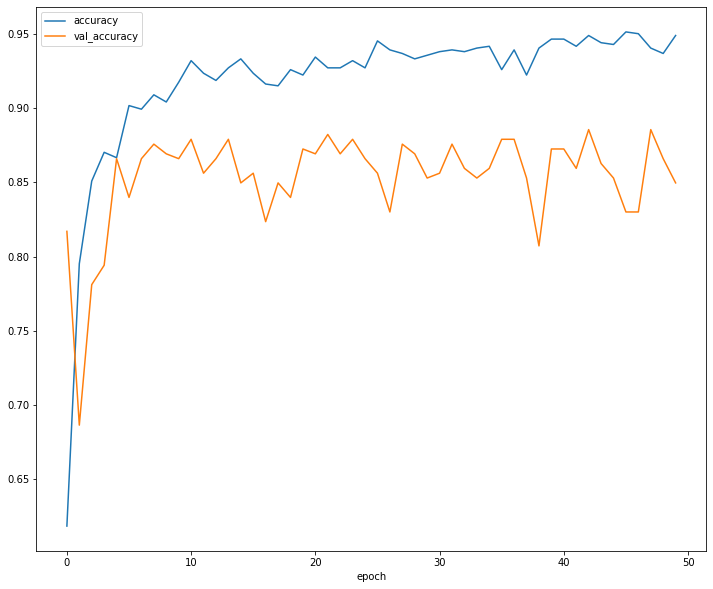

In [46]:
plt.figure(figsize=(12,10))
plt.plot(train_model.history['accuracy'])
plt.plot(train_model.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.xlabel('epoch')
plt.show()

# Using trained Model to detect face masks on the static images



In [47]:
from tensorflow.keras.preprocessing import image

In [48]:
directory = r"C:\Users\Uchiha_Itachi\Downloads\Compressed\2020\Untitled Folder\New Masks Dataset"
stat1 = os.path.join(directory,'Static_Images')
stat1_img = os.listdir(stat1)
#print(stat1_img)
static_img = []

In [49]:
for i in stat1_img[:]:
    static_img.append(os.path.join(stat1,i))

#print(static_img)


### Passing images recursively to our model from the Static Images folder, to check our prediction.

In [50]:
for i in range(0,len(static_img)):
    data = static_img[i].split('\\',9)[9]
    img = image.load_img(static_img[i],target_size=(200,200))
    images = image.img_to_array(img)
    images = np.expand_dims(images,axis=0)
    prediction = image_model.predict(images)
    #print(data)
    
    if prediction == 0:
        print("Person is wearing a mask")
    else:
        print("Person is not wearing a mask")



Person is wearing a mask
Person is not wearing a mask


In [51]:
image_model.save('CNN_Model1.h5')